In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import scienceplots
%matplotlib inline

import sys
sys.path.append("/home/jonas/phd/NanoNets/src/")
sys.path.append("/mnt/c/Users/jonas/Desktop/phd/NanoNets/src/")

from scipy.interpolate import interp1d

import nanonets_utils
import nanonets

In [63]:
def plot_freq(f, ax, min_y, max_y, N_f=5):

    ax.vlines(f, min_y, max_y, colors='black', linestyles='solid', label=f"$f_0 = {f}$ GHz")

    for n in range(2,N_f+1):
        ax.vlines(n*f, min_y, max_y, colors='#A60628', linestyles='dotted')
    
    return ax

In [64]:
dic = {f : pd.read_csv(f"uniform/data/Nx=7_Ny=7_Nz=1_Ne=2_{f}.csv") for f in np.round(np.arange(0.3,6,0.1),2)}

In [65]:
dic.keys()

dict_keys([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9])

(0.0, 100.0)

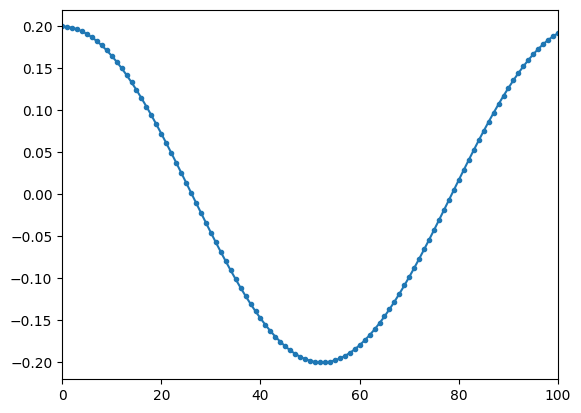

In [66]:
step_size   = 1e-10
N_voltages  = 10000
time        = step_size*np.arange(N_voltages)
amplitude   = 0.2

plt.plot(amplitude*np.cos(6*time*1e8), '.-')
plt.xlim(0,100)

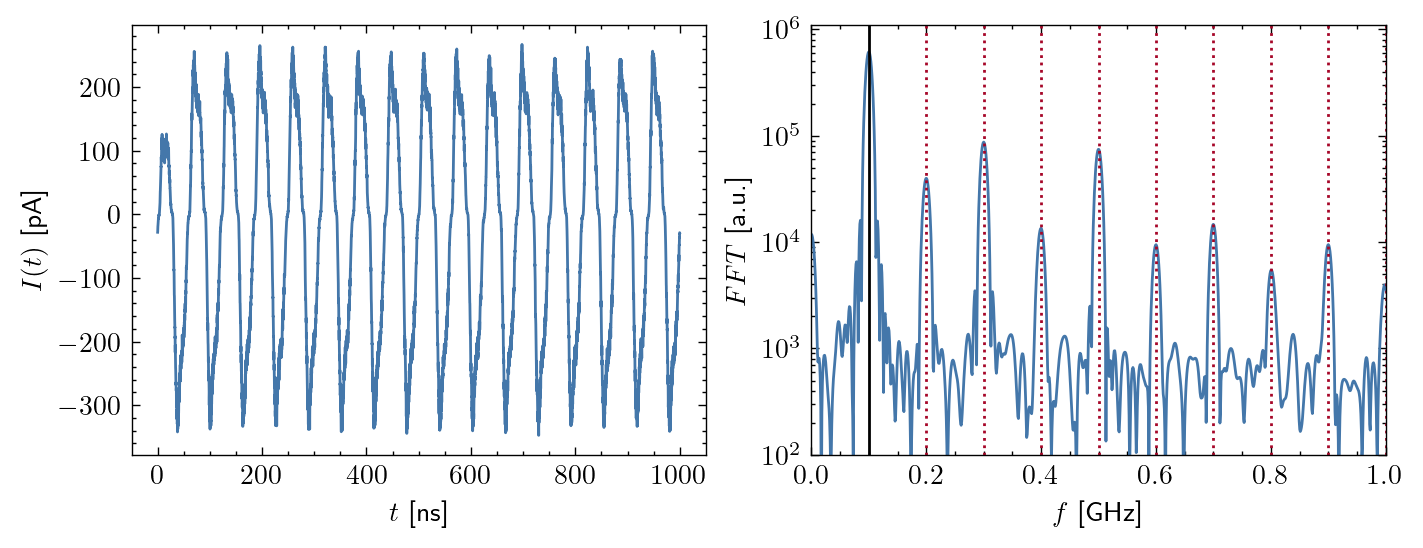

In [82]:
freq    = 1
signal  = dic[freq]['Current'].values
dt      = 1e-10
xf, yf  = nanonets_utils.fft(signal-np.mean(signal), dt, n_padded=65536)
time    = np.arange(len(signal))*dt*1e9
min_y   = 100
min_x   = 0
max_x   = 1
max_y   = 1.1e6

with plt.style.context(["science", "bright"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)

    ax = fig.add_subplot(1,2,1)
    ax.plot(time, signal)
    ax.set_ylabel("$I(t)$ [pA]")
    ax.set_xlabel("$t$ [ns]")
    # ax.set_ylim(-100,100)
    # ax.set_xlim(0,50)

    ax  = fig.add_subplot(1,2,2)
    ax.plot(xf,yf)
    ax  = plot_freq(freq/10, ax=ax, min_y=min_y, max_y=max_y, N_f=10)
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)
    ax.set_yscale('log')
    ax.set_xlabel("$f$ [GHz]")
    ax.set_ylabel("$FFT$ [a.u.]")

    fig.savefig("plots/fft_output_example.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/fft_output_example.svg", transparent=True, bbox_inches='tight')

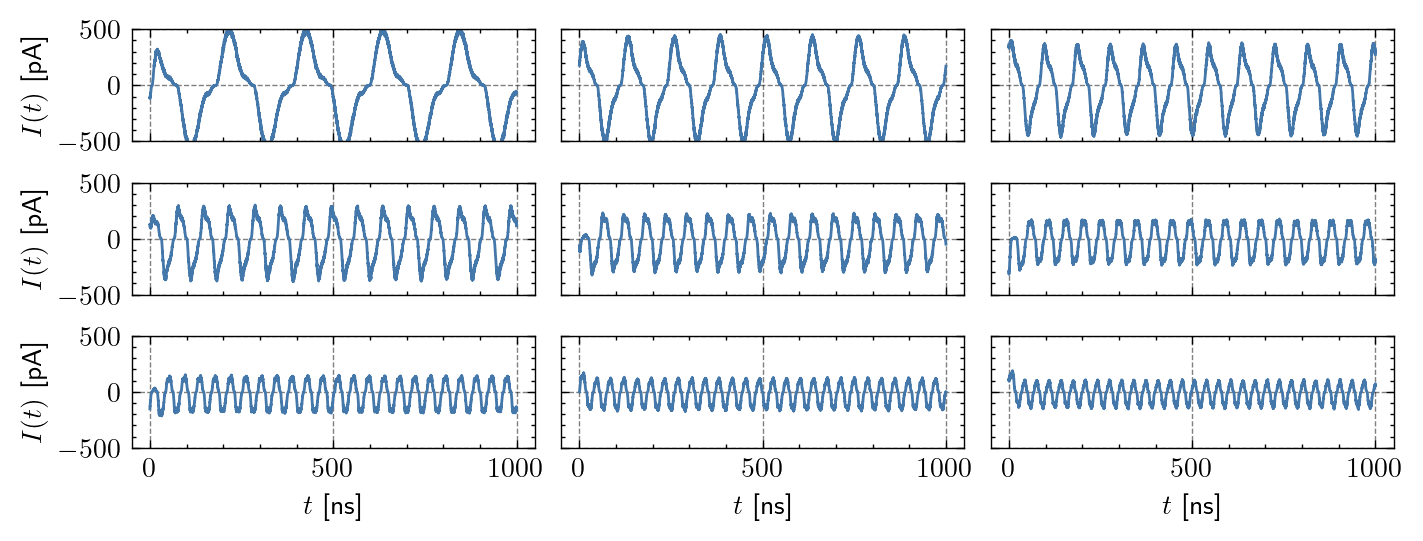

In [84]:
cmap    = plt.get_cmap('Reds')
f_vals  = np.round(np.arange(0.3,2,0.2),2)
miny    = 1e1
maxy    = 1e5
dt      = 1e-10
n_rows  = 3
n_cols  = 3

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*1.2)
    
    for i, f in enumerate(f_vals):

        ax      = fig.add_subplot(4,3,i+1)
        signal  = dic[f]['Current'].values
        
        ax.plot(time,signal)

        if i % n_cols == 0:
            ax.set_ylabel('$I(t)$ [pA]')
        else:
            ax.set_yticklabels("")

        if i >= (n_rows-1)*3:
            ax.set_xlabel('$t$ [ns]')
        else:
            ax.set_xticklabels("")

        ax.set_ylim(-500,500)
        
    fig.savefig("plots/output_comparsion.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/output_comparsion.svg", transparent=True, bbox_inches='tight')

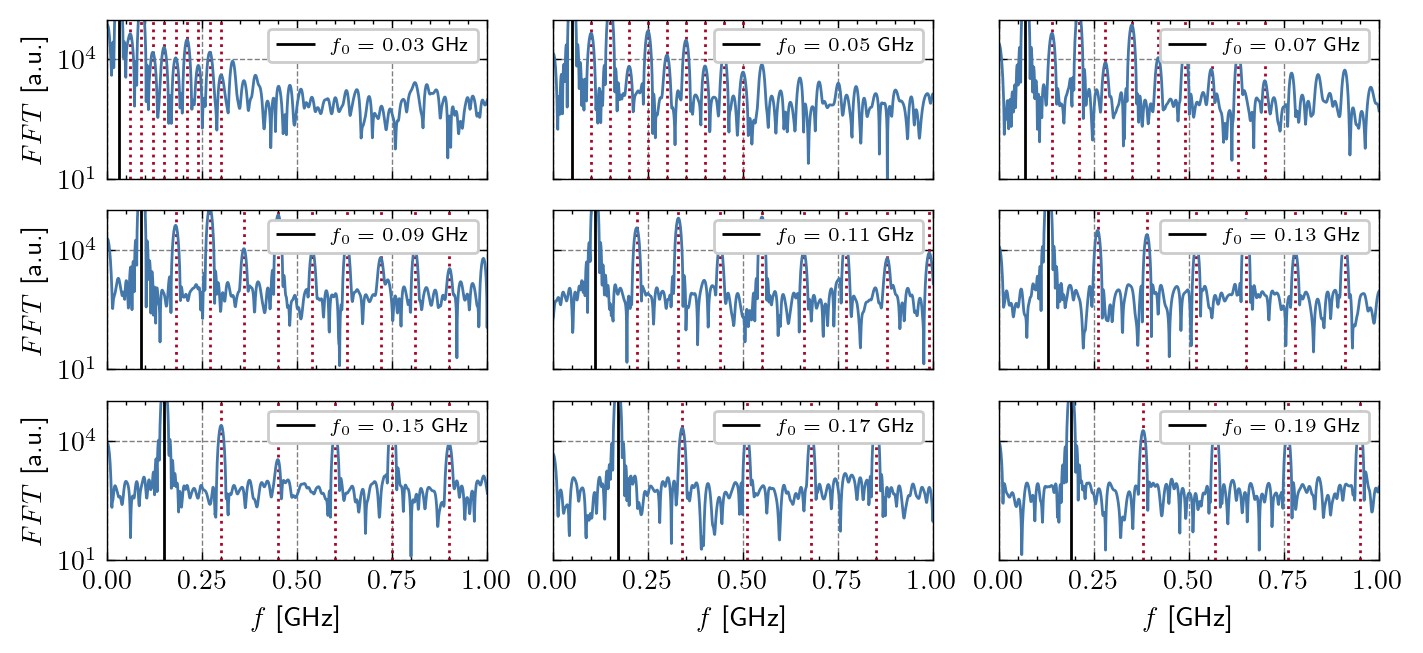

In [85]:
cmap    = plt.get_cmap('Reds')
miny    = 1e1
maxy    = 1e5
dt      = 1e-10
n_rows  = 3
n_cols  = 3

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200, layout='constrained')
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*1.2)
    
    for i, f in enumerate(f_vals):

        ax      = fig.add_subplot(n_rows,n_cols,i+1)
        signal  = dic[f]['Current'].values
        
        xf, yf  = nanonets_utils.fft(signal-np.mean(signal), dt, n_padded=65536)
        ax      = plot_freq(np.round(f/10,2), ax, miny, maxy, N_f=10)

        ax.plot(xf, yf)
        ax.set_xlim(0,1)
        ax.set_ylim(miny, maxy)
        ax.set_yscale('log')
        ax.legend(fontsize='x-small', loc='upper right')

        if i % n_cols == 0:
            ax.set_ylabel('$FFT$ [a.u.]')
        else:
            ax.set_yticklabels("")

        if i >= (n_rows-1)*3:
            ax.set_xlabel('$f$ [GHz]')
        else:
            ax.set_xticklabels("")

    fig.savefig("plots/fft_comparsion.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/fft_comparsion.svg", transparent=True, bbox_inches='tight')

In [86]:
def relate_to_fundamental_freq(signal, f, dt, N_f=10):

    xf, yf  = nanonets_utils.fft(signal, dt, n_padded=65536)
    func    = interp1d(xf, yf)

    vals    = []
    for n in range(1,N_f+1):
        vals.append(func(n*f/10))
    
    return np.array(vals)

In [87]:
N_f                 = 10
df_fft_amplitudes   = pd.DataFrame()

for f in dic.keys():
    
    signal  = dic[f]['Current'].values
    vals    = relate_to_fundamental_freq(signal, f, dt, N_f=N_f)

    df_fft_amplitudes[f] = vals

df_nonlinear    = df_fft_amplitudes / df_fft_amplitudes.iloc[0,:]
df_nonlinear    = df_nonlinear.drop(0).reset_index(drop=True)
df_nonlinear

,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,...,5.0,5.1,5.2,5.3,5.4,5.5,5.6,5.7,5.8,5.9
0,0.043136,0.049433,0.050515,0.055833,0.057638,0.059266,0.062442,0.064845,0.064397,0.065572,...,0.384089,0.374432,0.379831,0.384293,0.364787,0.360813,0.355037,0.359075,0.340782,0.345704
1,0.307328,0.296486,0.278704,0.256839,0.230885,0.201360,0.171425,0.142161,0.113304,0.081482,...,0.126864,0.118117,0.121329,0.108471,0.105209,0.103309,0.098340,0.087633,0.079000,0.084272
2,0.014966,0.010994,0.007390,0.007774,0.010476,0.014032,0.016104,0.021970,0.024679,0.027780,...,0.016249,0.009251,0.011944,0.011017,0.015879,0.001878,0.002099,0.006510,0.019098,0.024076
3,0.019798,0.035630,0.056994,0.076771,0.093103,0.106508,0.113955,0.121457,0.121382,0.123848,...,0.020022,0.023509,0.018643,0.019702,0.010106,0.015067,0.020738,0.002730,0.016572,0.018412
4,0.010826,0.012908,0.014195,0.014655,0.014053,0.015033,0.014250,0.015421,0.015847,0.014743,...,0.008126,0.012079,0.010148,0.008952,0.006691,0.015990,0.005247,0.003269,0.004508,0.008073
5,0.031105,0.034351,0.033443,0.029463,0.025231,0.023191,0.022630,0.023946,0.030423,0.033552,...,0.003335,0.004977,0.010319,0.004081,0.008760,0.009383,0.002077,0.007184,0.009815,0.008311
6,0.006987,0.007424,0.007521,0.007849,0.007069,0.007830,0.009679,0.008804,0.011065,0.011173,...,0.005925,0.006021,0.009386,0.008214,0.005551,0.012664,0.001241,0.010187,0.005373,0.008043
7,0.015075,0.014540,0.015693,0.017511,0.019049,0.017537,0.015973,0.015427,0.015045,0.012696,...,0.006218,0.005021,0.004943,0.006263,0.009319,0.010584,0.007553,0.008347,0.009832,0.009545
8,0.004036,0.004476,0.005285,0.004441,0.003674,0.002479,0.004987,0.006203,0.008393,0.007414,...,0.007949,0.002134,0.002462,0.004994,0.003036,0.003965,0.004430,0.001827,0.006659,0.002883


In [88]:
df_nonlinear_new    = df_nonlinear.copy()
df_nonlinear_new    = df_nonlinear_new.set_index(np.arange(2,N_f+1))

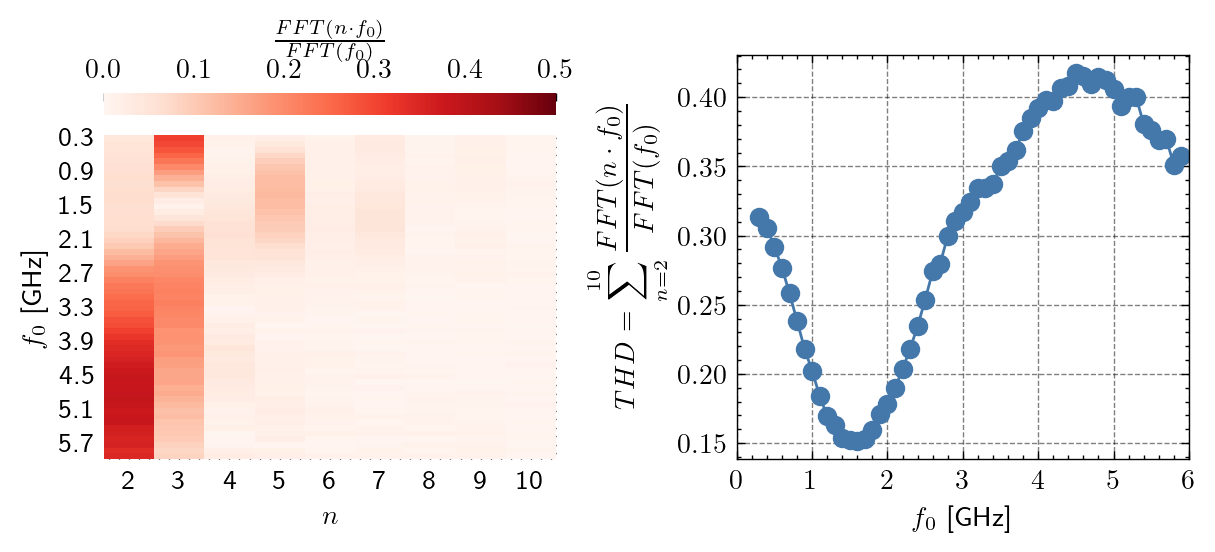

In [96]:
cmap = plt.get_cmap('Reds')

with plt.style.context(["science","bright", "grid"]):

    fig = plt.figure(dpi=200)
    ax  = fig.add_subplot(1,2,1)
    fig.set_figwidth(fig.get_figwidth()*2)

    ax  = sns.heatmap(df_nonlinear_new.T, cmap='Reds', ax=ax, cbar_kws={'label':"$\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$", "location":"top"}, vmin=0, vmax=0.5)
    ax.set_ylabel("$f_0$ [GHz]")
    ax.set_xlabel("$n$")

    # for i, col in enumerate(df_nonlinear.columns):
    #     ax.plot(np.arange(2,len(df_fft_amplitudes)+1), df_nonlinear[col], c=cmap((i+1)/(len(df_nonlinear.columns))))

    # ax.set_ylabel("$\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$")
    # ax.set_xlabel("$n$")

    ax  = fig.add_subplot(1,2,2)
    ax  = np.sqrt((df_nonlinear**2).sum()).plot(ax=ax, marker='o')
    ax.set_ylabel("$THD$ = $\displaystyle\sum_{n=2}^{10}\\frac{FFT(n \cdot f_0)}{FFT(f_0)}$")
    ax.set_xlabel("$f_0$ [GHz]")
    ax.set_xlim(0,6)

    plt.subplots_adjust(wspace=0.4)
    plt.locator_params(axis='x', nbins=8)

    fig.savefig("plots/harmonic_generation.png", transparent=True, bbox_inches='tight')
    fig.savefig("plots/harmonic_generation.svg", transparent=True, bbox_inches='tight')

---

In [289]:
def average_outputs(folder, N_stat, N_threads):

    values          = [pd.read_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means           = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns)
    means['Error']  = np.std(values,axis=0)[:,-2]/np.sqrt(len(values))

    means.to_csv(folder+f"/Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

def average_states(folder, N_stat, N_threads):

    values  = [pd.read_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2_t{j}_s{k}.csv") for j in range(N_threads) for k in range(N_stat)]
    means   = pd.DataFrame(np.mean(values, axis=0),columns=values[0].columns).round(3)
    
    means.to_csv(folder+f"/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv", index=0)

freq = "f3/"

# Combine output currents
average_outputs(f"1I_1O_R_corr/data/{freq}R_50/", 10, 10)
average_outputs(f"1I_1O_R_corr/data/{freq}R_100/", 10, 10)
average_outputs(f"1I_1O_R_corr/data/{freq}R_200/", 10, 10)
# average_outputs(f"1I_1O_R_corr/data/{freq}R_400/", 10, 10)

# Combine states
average_states(f"1I_1O_R_corr/data/{freq}R_50/", 10 , 10)
average_states(f"1I_1O_R_corr/data/{freq}R_100/", 10 , 10)
average_states(f"1I_1O_R_corr/data/{freq}R_200/", 10 , 10)
# average_states(f"1I_1O_R_corr/data/{freq}R_400/", 10 , 10)

In [2]:
freq                = "f3/"
results             = pd.DataFrame()
results["t"]        = np.loadtxt("1I_1O_R_corr/time.csv")[1:]*10**9
results['U']        = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_50/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']
results["R_50_I"]   = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_50/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_50_uI"]  = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_50/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["R_100_I"]  = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_100/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_100_uI"] = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_100/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
results["R_200_I"]  = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_200/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
results["R_200_uI"] = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_200/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
# results["R_400_I"]  = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_400/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
# results["R_400_uI"] = pd.read_csv(f"1I_1O_R_corr/data/{freq}R_400/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']

results = results.iloc[1000:,:].reset_index(drop=True)
results

FileNotFoundError: 1I_1O_R_corr/time.csv not found.

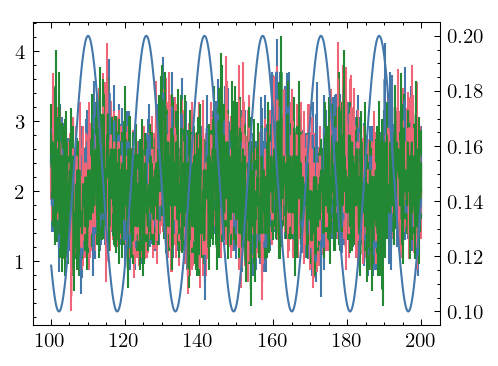

In [291]:
with plt.style.context(["science","bright"]):

    fig = plt.figure(dpi=150)
    ax  = fig.add_subplot()
    ax2 = ax.twinx()
    ax2.plot(results['t'], results['U'])
    ax.errorbar(results['t'], results['R_50_I']/1000, results['R_50_uI']/1000)
    ax.errorbar(results['t'], results['R_100_I']/1000, results['R_100_uI']/1000)
    ax.errorbar(results['t'], results['R_200_I']/1000, results['R_200_uI']/1000)
    # ax.errorbar(results['t'], results['R_400_I'], results['R_400_uI'])

In [ ]:
# data = {}

# results         = pd.DataFrame()
# results["t"]    = np.loadtxt("1I_1O/time.csv")[1:]*10**9
# results['U']    = pd.read_csv("1I_1O/data/f1/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']
# results["I"]    = pd.read_csv("1I_1O/data/f1/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
# results["uI"]   = pd.read_csv("1I_1O/data/f1/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
# data[5e7]       = results

# results         = pd.DataFrame()
# results["t"]    = np.loadtxt("1I_1O/time.csv")[1:]*10**9
# results['U']    = pd.read_csv("1I_1O/data/f2/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']
# results["I"]    = pd.read_csv("1I_1O/data/f2/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
# results["uI"]   = pd.read_csv("1I_1O/data/f2/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
# data[10e7]      = results

# results         = pd.DataFrame()
# results["t"]    = np.loadtxt("1I_1O/time.csv")[1:]*10**9
# results['U']    = pd.read_csv("1I_1O/data/f3/Nx=7_Ny=7_Nz=1_Ne=2.csv")['E0']
# results["I"]    = pd.read_csv("1I_1O/data/f3/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Current']
# results["uI"]   = pd.read_csv("1I_1O/data/f3/Nx=7_Ny=7_Nz=1_Ne=2.csv")['Error']
# data[20e7]      = results

In [ ]:
# with plt.style.context(["science","bright"]):

#     fig = plt.figure(dpi=150)
#     fig.set_figheight(fig.get_figheight())
    
#     ax  = fig.add_subplot(3,1,1)
#     ax.errorbar(data[5e7]['t'], data[5e7]['I']/1000, data[5e7]['uI']/1000)
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_ylim(-6,6)
#     ax.set_xticklabels("")

#     ax2 = ax.twinx()
#     ax2.plot(data[5e7]['t'], data[5e7]['U'], c='#A60628', label=f"$f = {5e7 / 10**9}$ nHz")
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax2.legend(fontsize='x-small', loc='upper right', frameon=True)

#     ax  = fig.add_subplot(3,1,2)
#     ax.errorbar(data[10e7]['t'], data[10e7]['I']/1000, data[10e7]['uI']/1000)
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_ylim(-6,6)
#     ax.set_xticklabels("")

#     ax2 = ax.twinx()
#     ax2.plot(data[10e7]['t'], data[10e7]['U'], c='#A60628', label=f"$f = {10e7 / 10**9}$ nHz")
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax2.legend(fontsize='x-small', loc='upper right', frameon=True)

#     ax  = fig.add_subplot(3,1,3)
#     ax.errorbar(data[20e7]['t'], data[20e7]['I']/1000, data[20e7]['uI']/1000)
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_ylim(-6,6)
#     ax.set_xlabel("$t$ [ns]")

#     ax2 = ax.twinx()
#     ax2.plot(data[20e7]['t'], data[20e7]['U'], c='#A60628', label=f"$f = {20e7 / 10**9}$ nHz")
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax2.legend(fontsize='x-small', loc='upper right', frameon=True)


In [ ]:
# with plt.style.context(["science","bright"]):

#     fig = plt.figure(dpi=150)
#     fig.set_figheight(fig.get_figheight())
    
#     ax  = fig.add_subplot(3,1,1)
#     ax2 = ax.twinx()
#     ax2.plot(results['t'], results['U'], c='#A60628')
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')

#     ax.errorbar(results['t'], results['I']/1000, results['uI']/1000, label='uniform')
#     ax.set_xticklabels("")
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.legend()

#     ax  = fig.add_subplot(3,1,2)
#     ax2 = ax.twinx()
#     ax2.plot(results['t'], results['U'], c='#A60628')
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax.errorbar(results['t'], results['r_I']/1000, results['r_uI']/1000, label='r-Island')
#     ax.set_xticklabels("")
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.legend()

#     ax  = fig.add_subplot(3,1,3)
#     ax2 = ax.twinx()
#     ax2.plot(results['t'], results['U'], c='#A60628')
#     ax2.set_ylabel("$U_0$ [mV]", c='#A60628')
#     ax.errorbar(results['t'], results['R_I']/1000, results['R_uI']/1000, label='R-Island')
#     ax.set_ylabel("$I$ [nA]", c='#348ABD')
#     ax.set_xlabel("$t$ [ns]")
#     ax.legend()

#     fig.savefig('plots/i_o_comp.svg', bbox_inches='tight', transparent=True)
#     fig.savefig('plots/i_o_comp.pdf', bbox_inches='tight', transparent=False)

In [ ]:
# x   = results["t"].values
# y   = results["U"].values

# def update(num, x, y, line):
#     line.set_data(x[:num], y[:num])
#     # line.axes.axis([xmin,xmax,ymin,ymax])
    
#     return line,

# with plt.style.context(["science","bright"]):

#     fig     = plt.figure(dpi=150)
#     ax      = fig.add_subplot()
#     # ax.set_xlabel("$t$ [ns]")
#     # ax.set_ylabel("$U_0$ [mV]")
    
#     line,   = ax.plot(x, y, lw=3)
#     ani     = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line], interval=50, repeat_delay=500)

# ani.save("plots/input.gif")

In [292]:
dic = {
    "R_50"    : pd.read_csv(f"1I_1O_R_corr/data/{freq}R_50/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_100"   : pd.read_csv(f"1I_1O_R_corr/data/{freq}R_100/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    "R_200"   : pd.read_csv(f"1I_1O_R_corr/data/{freq}R_200/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv"),
    # "R_400"   : pd.read_csv(f"1I_1O_R_corr/data/{freq}R_400/mean_state_Nx=7_Ny=7_Nz=1_Ne=2.csv")
}

for key, df in dic.items():
    dic[key] = df.iloc[1000:,:].reset_index(drop=True)

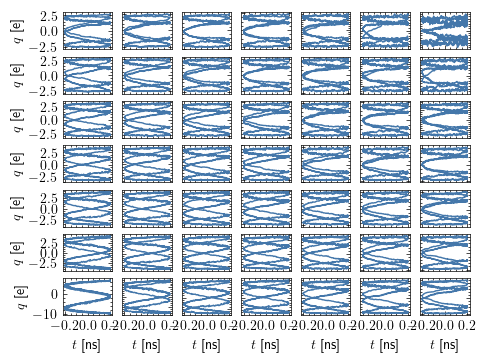

In [293]:
def scale_landscape(arr):
    return np.round((arr - np.min(arr,axis=0))/(np.max(arr,axis=0)-np.min(arr,axis=0)),2)

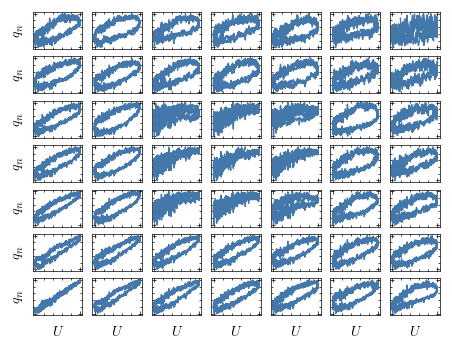

In [282]:
key = "R_200"

with plt.style.context(["science","bright"]):

    fig, axs = plt.subplots(ncols=7, nrows=7)

    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1.5)

    i = 0

    for row in np.arange(6,-1,-1):
        for col in range(0,7):

            axs[row,col].plot(results["U"]*1000, scale_landscape(dic[key][f"{i}"]).values)

            if i >= 7:
                axs[row,col].set_xticklabels("")
            else:
                axs[row,col].set_xticklabels("")
                axs[row,col].set_xlabel("$U$")

            if i % 7 != 0:
                axs[row,col].set_yticklabels("")
            else:
                axs[row,col].set_yticklabels("")
                axs[row,col].set_ylabel("$q_n$")

            i += 1

    # fig.savefig('plots/state_vs_time.svg', bbox_inches='tight', transparent=True)
    # fig.savefig('plots/state_vs_time.pdf', bbox_inches='tight', transparent=False)

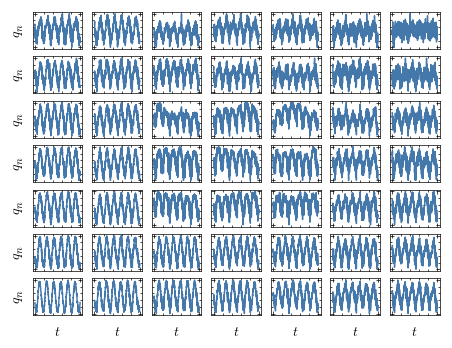

In [294]:
key = "R_200"

with plt.style.context(["science","bright"]):

    fig, axs = plt.subplots(ncols=7, nrows=7)

    fig.set_figwidth(fig.get_figwidth()*1.5)
    fig.set_figheight(fig.get_figheight()*1.5)

    i = 0

    for row in np.arange(6,-1,-1):
        for col in range(0,7):

            axs[row,col].plot(results["t"], scale_landscape(dic[key][f"{i}"]).values)

            if i >= 7:
                axs[row,col].set_xticklabels("")
            else:
                axs[row,col].set_xticklabels("")
                axs[row,col].set_xlabel("$t$")

            if i % 7 != 0:
                axs[row,col].set_yticklabels("")
            else:
                axs[row,col].set_yticklabels("")
                axs[row,col].set_ylabel("$q_n$")

            i += 1

    # fig.savefig('plots/state_vs_time.svg', bbox_inches='tight', transparent=True)
    # fig.savefig('plots/state_vs_time.pdf', bbox_inches='tight', transparent=False)

In [260]:
from scipy.fft import fft, rfft, fftfreq, rfftfreq

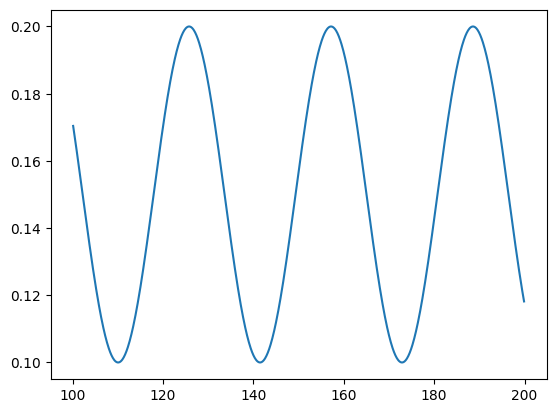

In [285]:
plt.plot(results["t"], results["U"])

In [284]:
def return_fft(arr : np.array, step_size : float):

    arr_norm    = (arr-np.min(arr))/(np.max(arr)-np.min(arr))
    sample_rate = 1/step_size

    xf      = rfftfreq(len(arr), 1. / sample_rate)
    yf      = np.abs(rfft(arr_norm))

    # xf          = np.fft.rfftfreq(len(arr), d=1./sample_rate)
    # yf          = 2*np.abs(np.fft.rfft(arr))/len(arr)

    return xf, yf

In [265]:
arr1 = results["U"].values
arr2 = dic["R_200"].values[:,24]
arr3 = results["R_200_I"].values

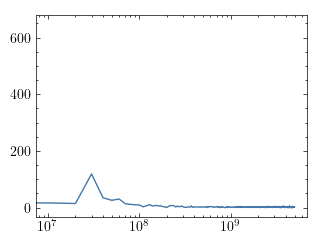

In [288]:
arr     = dic["R_200"].values[:,24]
xf, yf  = return_fft(arr, 1e-10)

with plt.style.context(["science","bright"]):
    
    fig = plt.figure()
    ax  = fig.add_subplot()
    ax.plot(xf, yf)
    ax.set_xscale("log")

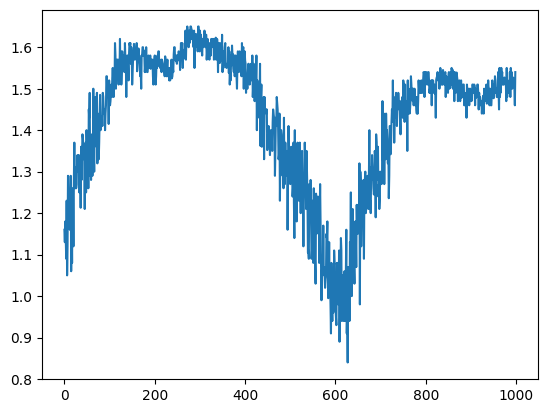

In [266]:
plt.plot(arr2)

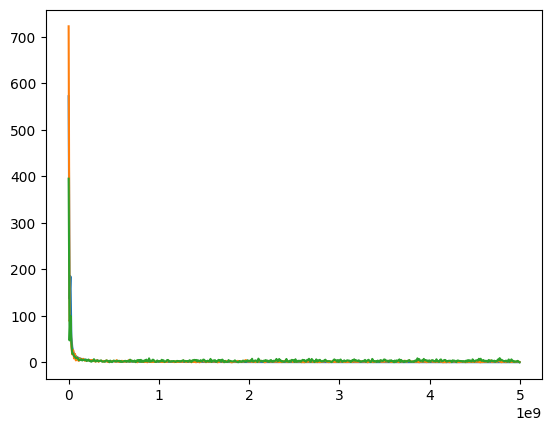

In [268]:
step_size   = 1e-10
x, y        = return_fft(arr1, step_size)
plt.plot(x, y)
x, y        = return_fft(arr2, step_size)
plt.plot(x, y)
x, y        = return_fft(arr3, step_size)
plt.plot(x, y)
plt.xlim(0,1e8)

In [41]:
def nonlinear_index(df : pd.DataFrame, main_frequency : float, sample_rate : float, time_scale=10**6, number_of_frequencies=10):

    N_values    = len(df)
    values      = []

    for col in df.columns:

        # Fourier Spectrum
        arr     = df.loc[:,col].values
        xf      = rfftfreq(N_values-1, 1 / sample_rate)/time_scale
        yf      = 2*np.abs(rfft(arr))/N_values
        df_f    = pd.DataFrame([xf, yf]).T
        df_f    = df_f[df_f[0] >= main_frequency/time_scale]
        df_f    = df_f.loc[df_f.loc[:,1].nlargest(number_of_frequencies).index].reset_index(drop=True)

        a       = df_f.iloc[1:,1].sum()
        b       = df_f.iloc[0,1]

        n_idx   = a/b
        values.append(n_idx)

    return values

In [ ]:
# Example: Cubic Network
network_topology = "cubic"

# Network Parameter
topology_parameter = {
    "Nx"    : 7,
    "Ny"    : 7,
    "Nz"    : 1,
    "e_pos" : [[0,0,0],[6,6,0]]
}

# Network Class Object
np_network_cubic = nanonets.simulation(network_topology=network_topology, topology_parameter=topology_parameter)

In [ ]:
node_size = 150

fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
fig.savefig('plots/network_plot.svg', bbox_inches='tight', transparent=True)
fig.savefig('plots/network_plot.pdf', bbox_inches='tight', transparent=False)

node_size = np.repeat(150, 51)

for i in [16,17,18,23,24,25,30,31,32]:
    node_size[i] = 300

fig, ax = nanonets_utils.display_network(np_network_sim=np_network_cubic, node_size=node_size, provide_electrode_labels=["I","O"], font_size=25)
fig.savefig('plots/network_plot_radius.svg', bbox_inches='tight', transparent=True)
fig.savefig('plots/network_plot_radius.pdf', bbox_inches='tight', transparent=False)